# Plot Goals vs xG for Son in domestic leagues

## Imports

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import numpy as np
from highlight_text import fig_text

## Retrieve data

In [2]:
df = pd.read_csv("../../data/goals_xg/goals_xg.csv")

In [3]:
df

,Season,Apps,Gls,Ast,xG,xA,xG90
0,14-15,30,11,2,5.34,2.73,0.21
1,15-16,28,4,1,4.18,0.77,0.34
2,16-17,34,14,6,7.77,4.70,0.34
3,17-18,37,12,6,11.00,6.59,0.43
4,18-19,31,12,6,8.36,3.97,0.37
5,19-20,30,11,10,9.70,6.72,0.35
6,20-21,37,17,10,11.00,9.51,0.32


## Create the initial plot

In [4]:
season_short =['14-15','15-16','16-17','17-18','18-19','19-20','20-21']

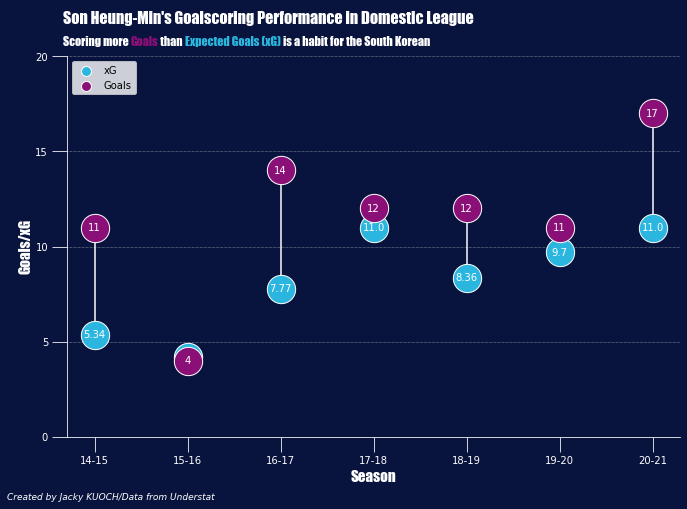

<Figure size 432x288 with 0 Axes>

In [5]:
fig,ax = plt.subplots(figsize = (11,7))

#Add grid to the plot
ax.grid(ls="dotted", lw="0.5", color="w", zorder=0, axis='y')

hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

#Change the ticks color
ax.tick_params(colors="w", length=15)

#Change the axes color
ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

#Plot Son xG
scatter = ax.scatter(df['Season'], df['xG'], color='#2bb6e0', edgecolor='w',s=800,zorder=3, label="xG")
#Plot Son Goals
scatter = ax.scatter(df['Season'], df['Gls'], color='#8A0F77', edgecolor='w',s=800,zorder=4, label="Goals")

#Legend
legend = ax.legend(loc="upper left")
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]

#Plot Goals and xG labels for each season.
for i in range (len(df)) :
    plt.vlines(x=season_short[i], ymin=df["xG"][i], ymax=df["Gls"][i], colors="w", zorder=2)
    plt.text(x=season_short[i], y=df["Gls"][i], s=df["Gls"][i], size=10, color="w", ha="center",va="center",zorder=4)
    plt.text(x=season_short[i], y=df["xG"][i], s=df["xG"][i], size=10, color="w", ha="center",va="center",zorder=3)

# Set the ticks
#plt.xticks(['14-15','15-16','16-17','17-18','18-19','19-20','20-21'])
plt.yticks([0,5,10,15,20])
ax.set_ylim(0,20)

# Axes Label
plt.xlabel("Season", color="w", fontsize=15 , **hfont)
plt.ylabel("Goals/xG", color="w", fontsize=15 , **hfont)

# Title and credits
fig_text(0.12,0.97, s="Son Heung-Min's Goalscoring Performance in Domestic League\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig_text(0.12,0.92, s="Scoring more <Goals> than <Expected Goals (xG)> is a habit for the South Korean",highlight_textprops=[{"color":"#8A0F77"}, {'color':"#2bb6e0"}], fontsize = 12, fontweight="light", color = "w", **hfont)
fig.text(0.05, 0, "Created by Jacky KUOCH/Data from Understat",fontstyle="italic",fontsize=9, color="w")

plt.show()
plt.tight_layout()